<a href="https://colab.research.google.com/github/syedsauda/CE888/blob/master/lab8/TransferLearning_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os

# Clone this repository to bring data to your virtual machine
!git clone https://github.com/sagihaider/CE888_2020.git
os.environ['KAGGLE_USERNAME'] = "syedsaud" # username from the json file
os.environ['KAGGLE_KEY'] = "fd0e8b53b31e55826c6a59cadd4fa367" # key from the json file
!kaggle competitions download -c dogs-vs-cats

Cloning into 'CE888_2020'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 25162 (delta 36), reused 4 (delta 0), pack-reused 25082
Receiving objects: 100% (25162/25162), 562.19 MiB | 51.87 MiB/s, done.
Resolving deltas: 100% (72/72), done.
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# Unzip the data from the zipped file
from zipfile import ZipFile
file_name = "/content/test1.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')
file_name = "/content/train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done
done


In [9]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

In [10]:

import numpy as np
import os
import time
from CE888_2020.Lab_8.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

In [11]:
img_path = '/content/CE888_2020/Lab_8/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print (x.shape)
x = np.expand_dims(x, axis=0)
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)


(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


---
Move cat and dog images to sub-directories

In [12]:
!mkdir train/cat
!mkdir train/dog
!mv train/cat.*.jpg train/cat/
!mv train/dog.*.jpg train/dog/

mkdir: cannot create directory ‘train/cat’: File exists
mkdir: cannot create directory ‘train/dog’: File exists


In [13]:
#Loading the training data

PATH = os.getcwd()
# Define data path
data_path = PATH + '/train'
data_dir_list = os.listdir(data_path)
img_data=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	img_list_new = img_list[:1000]
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list_new:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
    #	x = x/255
		# print('Input image shape:', x.shape)
		img_data.append(x)

print("Loaded all data into list")
#%% 
img_data = np.array(img_data)
print("copied data to array")
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)


Loaded the images of dataset-cat

Loaded the images of dataset-dog

Loaded all data into list
copied data to array
(2000, 1, 224, 224, 3)
(1, 2000, 224, 224, 3)
(2000, 224, 224, 3)


16gb used

---

In [14]:
# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]

labels = np.ones((num_of_samples,),dtype='int64')
print("created labels array")

labels[0:1000]=0
labels[1000:]=1
print("labaled all data")

names = ['cats','dogs']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
print("finished conversion to on-hot")

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
print("Shuffled dataset")
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print("split data")

created labels array
labaled all data
finished conversion to on-hot
Shuffled dataset
split data


In [15]:
#%% Fine Tuning

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()

552108032/553467096 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (M

In [16]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [17]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
	layer.trainable = False

custom_vgg_model2.summary()

custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
t=time.time()
#	t = now()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=4, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1600 samples, validate on 400 samples
Epoch 1/4
1600/1600 [==============================] - 202s - loss: 1.7962 - acc: 0.8563 - val_loss: 0.4452 - val_acc: 0.9625
Epoch 2/4
1600/1600 [==============================] - 199s - loss: 0.3668 - acc: 0.9669 - val_loss: 0.2505 - val_acc: 0.9775
Epoch 3/4
1600/1600 [==============================] - 199s - loss: 0.2194 - acc: 0.9813 - val_loss: 0.2846 - val_acc: 0.9725
Epoch 4/4
1600/1600 [==============================] - 200s - loss: 0.1730 - acc: 0.9838 - val_loss: 0.1910 - val_acc: 0.9850
Training time: -801.8607909679413
400/400 [==============================] - 42s    
[INFO] loss=0.1910, accuracy: 98.5000%


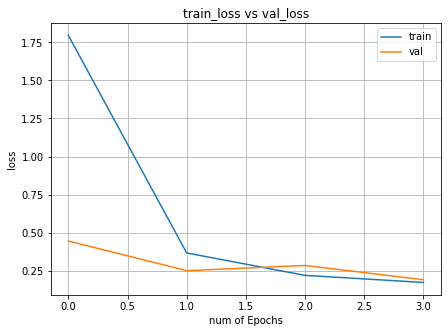

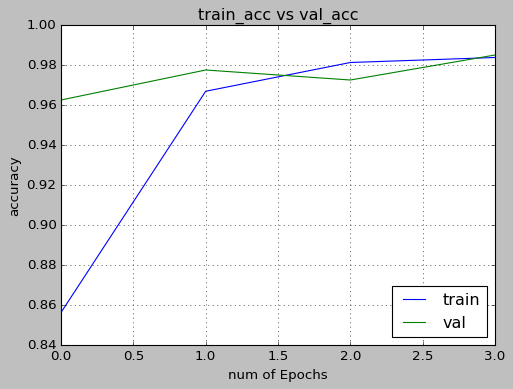

In [19]:
#%% plot
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(4)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])